# Draw a temperature graph
- source: temperature data in csv file(s)
- target: a graph show temperatures of some place

In [1]:
# process & store data
import csv
from datetime import datetime

filename = 'data\death_valley_2014.csv'
with open(filename) as f:      # file object = f
    reader = csv.reader(f)       # reader object = reader
    header_row = next(reader)    # next() = return the 'next' line

    # test: check what is saved in csv header
    #for index, column_header in enumerate(header_row):  # enumerate() get index & value
    #   print(index, column_header)
    
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

2014-02-16 00:00:00 missing data


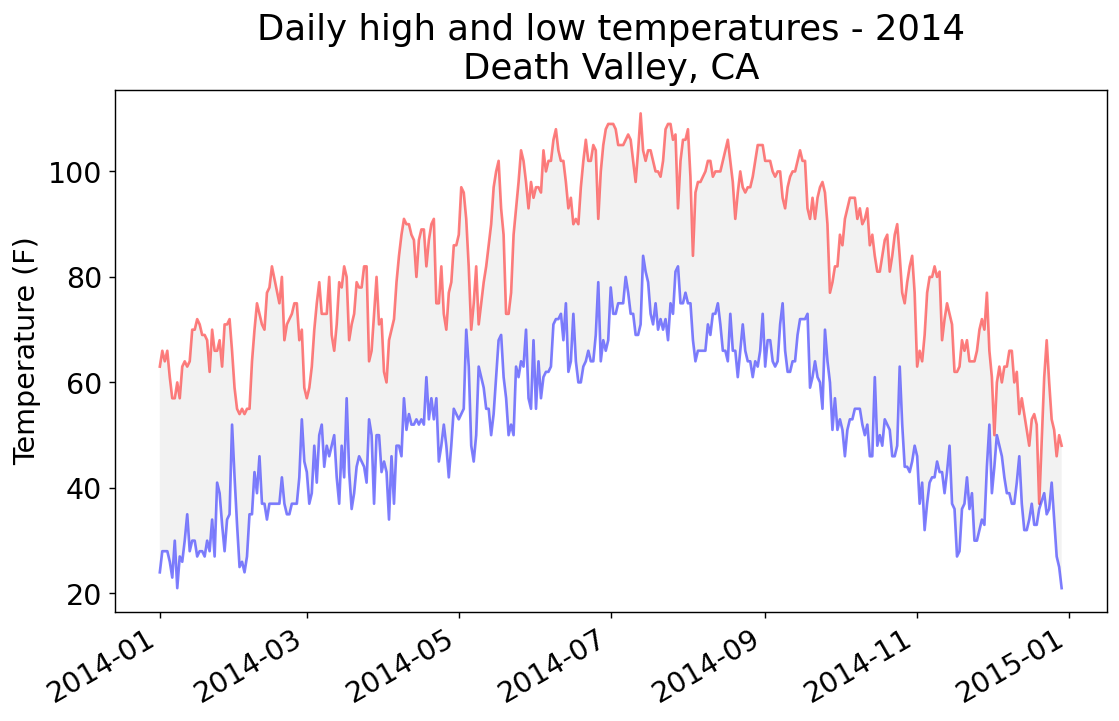

In [2]:
# plot the data
from matplotlib import pyplot as plt

# Plot data
# + fig is a canvas to draw more series
fig = plt.figure(dpi=128, figsize=(10, 6))
# + draw several series 
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='grey', alpha=0.1)

# Format plot
title = "Daily high and low temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()